In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
db = pymysql.connect(host='127.0.0.1', user='root', passwd=None, db='sgb')
#cur = db.cursor()
#cur.execute('SELECT * FROM aw_arep_aggregated_23897220029455b3f2a92e728f1fbbb5')


In [4]:
sql = 'SELECT * FROM aw_arep_aggregated_23897220029455b3f2a92e728f1fbbb5;'
orders01 = pd.read_sql(sql, con=db)

sql = 'SELECT * FROM aw_arep_aggregated_61c4a96a933e3b23629389d2de646adb;'
orders02 = pd.read_sql(sql, con=db)
db.close()

orders = orders01.append(orders02,  ignore_index=True)
orders.head()

,entity_id,period_key,order_increment_id,order_created_at,xsku,customer_email,customer_group,order_ship_country,order_ship_region,order_ship_city,...,base_row_xtotal,base_row_xtotal_incl_tax,base_row_xinvoiced,base_tax_invoiced,base_row_xinvoiced_incl_tax,base_row_xrefunded,base_tax_xrefunded,base_row_xrefunded_incl_tax,order_id,product_id
0,1,2013-12-05 23:07:03,1396932019,2013-12-05 23:07:03,2905,flamand_joshua@hotmail.com,General,CA,Ontario,Barrie,...,358.20,358.20,358.20,0.0,358.20,0.0,0.0,0.0,80284,518
1,2,2013-12-05 22:54:13,1396932015,2013-12-05 22:54:13,2884,kelehers_big5@yahoo.com,General,CA,Quebec,Montreal,...,24.80,24.80,24.80,0.0,24.80,0.0,0.0,0.0,80282,479
2,3,2013-12-05 22:54:13,1396932015,2013-12-05 22:54:13,2880,kelehers_big5@yahoo.com,General,CA,Quebec,Montreal,...,24.80,24.80,24.80,0.0,24.80,0.0,0.0,0.0,80282,464
3,4,2013-12-05 22:54:13,1396932015,2013-12-05 22:54:13,2543,kelehers_big5@yahoo.com,General,CA,Quebec,Montreal,...,191.68,191.68,191.68,0.0,191.68,0.0,0.0,0.0,80282,98
4,5,2013-12-05 22:17:19,1396932008,2013-12-05 22:17:19,2645,almth120@yahoo.ca,General,CA,Ontario,Thunder Bay,...,131.50,131.50,131.50,0.0,131.50,0.0,0.0,0.0,80274,91


In [5]:
orders.columns

Index(['entity_id', 'period_key', 'order_increment_id', 'order_created_at',
       'xsku', 'customer_email', 'customer_group', 'order_ship_country',
       'order_ship_region', 'order_ship_city', 'order_ship_postcode', 'name',
       'product_manufacturer', 'xqty_ordered', 'xqty_invoiced', 'xqty_shipped',
       'xqty_refunded', 'base_xprice', 'base_row_subtotal', 'base_tax_amount',
       'base_discount_amount', 'base_row_xtotal', 'base_row_xtotal_incl_tax',
       'base_row_xinvoiced', 'base_tax_invoiced',
       'base_row_xinvoiced_incl_tax', 'base_row_xrefunded',
       'base_tax_xrefunded', 'base_row_xrefunded_incl_tax', 'order_id',
       'product_id'],
      dtype='object')

In [6]:
selection = orders[['order_id','product_id']]
selection.head()

,order_id,product_id
0,80284,518
1,80282,479
2,80282,464
3,80282,98
4,80274,91


In [7]:
products_per_order = selection.groupby('order_id', as_index=False).count()
#products_per_order.to_csv('products_per_order.csv')
products_per_order.columns = ['Order ID', 'No. of Products']
products_per_order.to_csv('products_per_order.csv')
products_per_order.head()

,Order ID,No. of Products
0,79517,4
1,79519,1
2,79520,4
3,79521,1
4,79523,3


<Container object of 19779 artists>

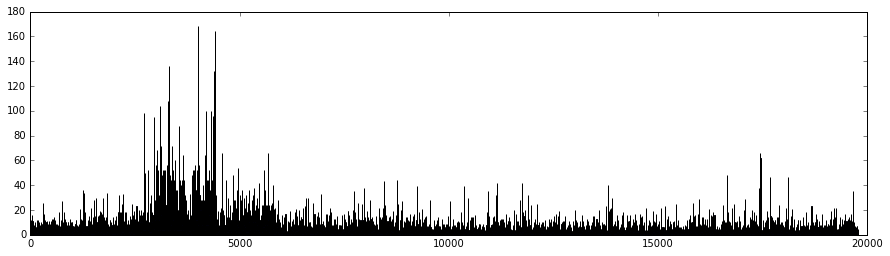

In [22]:
plt.figure(figsize=(15, 4))
x = products_per_order['Order ID']
y = products_per_order['No. of Products']
plt.bar(range(len(y)),y)